In [1]:
# Dependencies
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from pandas import DataFrame
from pandas import Series
import tweepy

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Save path to movies data file in a variable
Nbr_data_file = "Resources/TheNumbersGross.csv"

# Use Pandas to read data
gross_data_df = pd.read_csv(Nbr_data_file)
gross_data_df.head()

,Franchise,Release_Date,movie_title,Domestic_Gross,Worldwide_Gross
0,Star Trek,7-Dec-79,Star Trek: The Motion Picture,"$82,258,456","$139,000,000"
1,Star Trek,4-Jun-82,Star Trek II: The Wrath of Khan,"$78,912,963","$95,800,000"
2,Star Trek,1-Jun-84,Star Trek III: The Search for Spock,"$76,471,046","$87,000,000"
3,Star Trek,26-Nov-86,Star Trek IV: The Voyage Home,"$109,713,132","$133,000,000"
4,Star Trek,9-Jun-89,Star Trek V: The Final Frontier,"$52,210,049","$70,200,000"


In [3]:
# Save path to movies data file in a variable
data_file = "Resources/movie_data.csv"

# Use Pandas to read data from IMDB
movie_df = pd.read_csv(data_file)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [4]:
# Clean the data frame to remove the "Â" value in the movie title
%timeit movie_df.movie_title.apply(lambda x: x.replace('Â',''))

movie_df.head()

2.39 ms ± 91.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,936662225.0,Documentary,...,NaN,NaN,NaN,NaN,306000000.0,2015.0,12.0,7.1,NaN,0


In [5]:
# remove rows where any of the columns are set to NaN
movie_df = movie_df.dropna(how='any')
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [6]:
# Extract movie name, release date, budget and gross values
reduced_movie_df = movie_df.loc[:, ["movie_title", "budget", "gross","title_year"]]
reduced_movie_df

reduced_movie_df.head()

,movie_title,budget,gross,title_year
0,Avatar,237000000.0,760505847.0,2009.0
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0,2007.0
2,Spectre,245000000.0,200074175.0,2015.0
3,The Dark Knight Rises,250000000.0,448130642.0,2012.0
5,John Carter,263700000.0,73058679.0,2012.0


In [26]:
# Extract the Star Wars Movie information
starwars_df = reduced_movie_df[reduced_movie_df['movie_title'].str.contains("Star Wars")] 
starwars_df

starwars_df.head(15)

,movie_title,budget,gross,title_year
236,Star Wars: Episode III - Revenge of the Sith,113000000.0,380262555.0,2005.0
237,Star Wars: Episode II - Attack of the Clones,115000000.0,310675583.0,2002.0
240,Star Wars: Episode I - The Phantom Menace,115000000.0,474544677.0,1999.0
1536,Star Wars: Episode VI - Return of the Jedi,32500000.0,309125409.0,1983.0
2051,Star Wars: Episode V - The Empire Strikes Back,18000000.0,290158751.0,1980.0
3024,Star Wars: Episode IV - A New Hope(Star Wars),11000000.0,460935665.0,1977.0


In [27]:
starwars_df['budget'] = starwars_df['budget'].astype(float).map("${:,.2f}".format)
starwars_df['gross'] = starwars_df['gross'].astype(float).map("${:,.2f}".format)
starwars_df['title_year'] = starwars_df['title_year'].astype(int)

starwars_df.head(10)

C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dms40pj\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,movie_title,budget,gross,title_year
236,Star Wars: Episode III - Revenge of the Sith,"$113,000,000.00","$380,262,555.00",2005
237,Star Wars: Episode II - Attack of the Clones,"$115,000,000.00","$310,675,583.00",2002
240,Star Wars: Episode I - The Phantom Menace,"$115,000,000.00","$474,544,677.00",1999
1536,Star Wars: Episode VI - Return of the Jedi,"$32,500,000.00","$309,125,409.00",1983
2051,Star Wars: Episode V - The Empire Strikes Back,"$18,000,000.00","$290,158,751.00",1980
3024,Star Wars: Episode IV - A New Hope(Star Wars),"$11,000,000.00","$460,935,665.00",1977


In [28]:
# Extract the Star Wars Movie information
starwars_gross_df = gross_data_df[gross_data_df['movie_title'].str.contains("Star Wars")] 
starwars_gross_df

starwars_gross_df.head(15)

,Franchise,Release_Date,movie_title,Domestic_Gross,Worldwide_Gross
13,Star Wars,25-May-77,Star Wars Ep. IV: A New Hope(Star Wars),"$460,998,007","$786,598,007"
14,Star Wars,20-May-80,Star Wars Ep. V: The Empire Strikes Back,"$290,271,960","$534,171,960"
15,Star Wars,25-May-83,Star Wars Ep. VI: Return of the Jedi,"$309,205,079","$572,705,079"
16,Star Wars,19-May-99,Star Wars Ep. I: The Phantom Menace,"$474,544,677","$1,027,044,677"
17,Star Wars,16-May-02,Star Wars Ep. II: Attack of the Clones,"$310,676,740","$656,695,615"
18,Star Wars,19-May-05,Star Wars Ep. III: Revenge of the Sith,"$380,270,577","$848,998,877"
19,Star Wars,16-Dec-15,Star Wars Ep. VII: The Force Awakens,"$936,662,225","$2,058,601,220"
20,Star Wars,14-Dec-16,Rogue One: A Star Wars Story(Star Wars Rogue One),"$532,177,324","$1,050,988,488"
21,Star Wars,13-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$620,181,382","$1,317,178,532"
22,Star Wars,23-May-18,Solo: A Star Wars Story,"$213,745,535","$385,307,085"


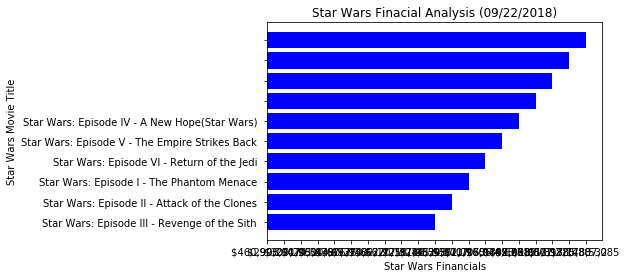

In [30]:
# Create bar chart for Starwars Franchise
title = starwars_gross_df['movie_title']
d_gross = starwars_gross_df['Domestic_Gross']
w_gross = starwars_gross_df['Worldwide_Gross']

y_axis = np.arange(len(title))
x_axis = np.arange(len(d_gross))

plt.barh(y_axis, d_gross, color="g", align="center")
plt.barh(y_axis, w_gross, color="b", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, starwars_df['movie_title'])

# Get the current date for display
now = datetime.now()
now = now.strftime("%m/%d/%Y")

# Give our chart some labels and a tile
plt.title(f"Star Wars Finacial Analysis ({now})")
plt.ylabel("Star Wars Movie Title")
plt.xlabel("Star Wars Financials")

# Save Figure
plt.savefig("Fig1.png")

# Show plot
plt.show()